In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot

In [6]:
# Read file
data = pd.read_csv("./consumption_temp.csv")
# Convert datatypes
data["time"] = pd.to_datetime(data["time"])
data["consumption"] = pd.to_numeric(data["consumption"])
data["temperature"] = pd.to_numeric(data["temperature"])
data_cities = {location: data[data["location"] == location] for location in data["location"].unique()}
print(data.columns)


Index(['time', 'location', 'consumption', 'temperature'], dtype='object')


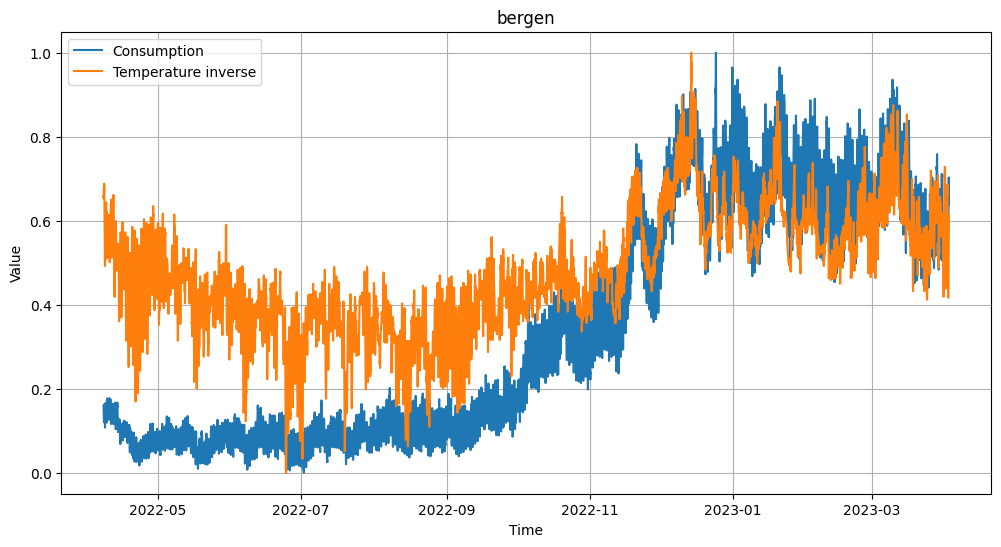

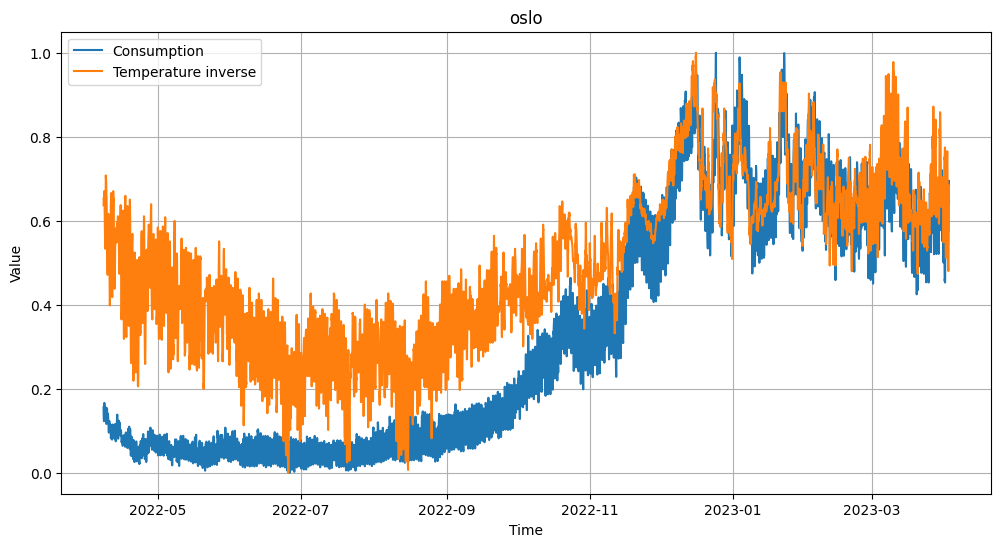

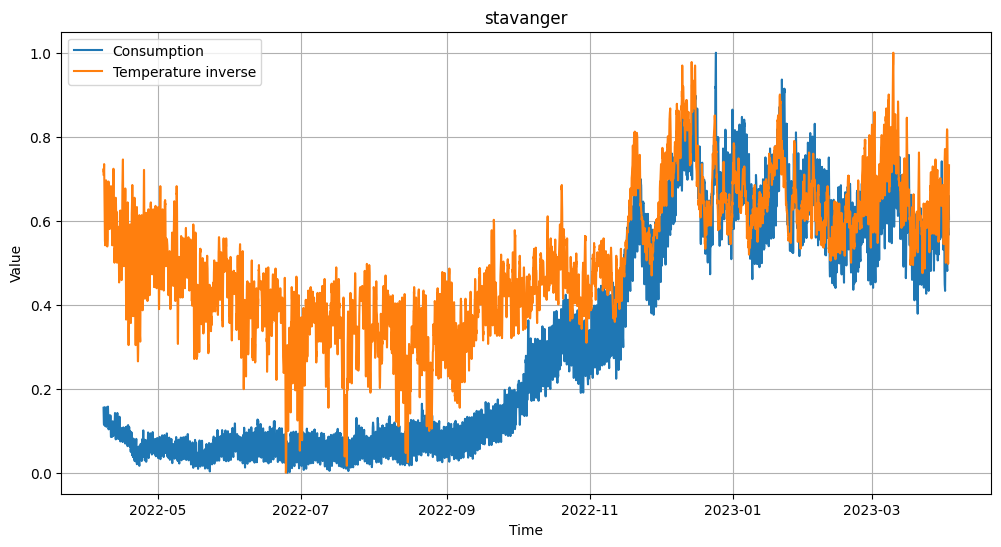

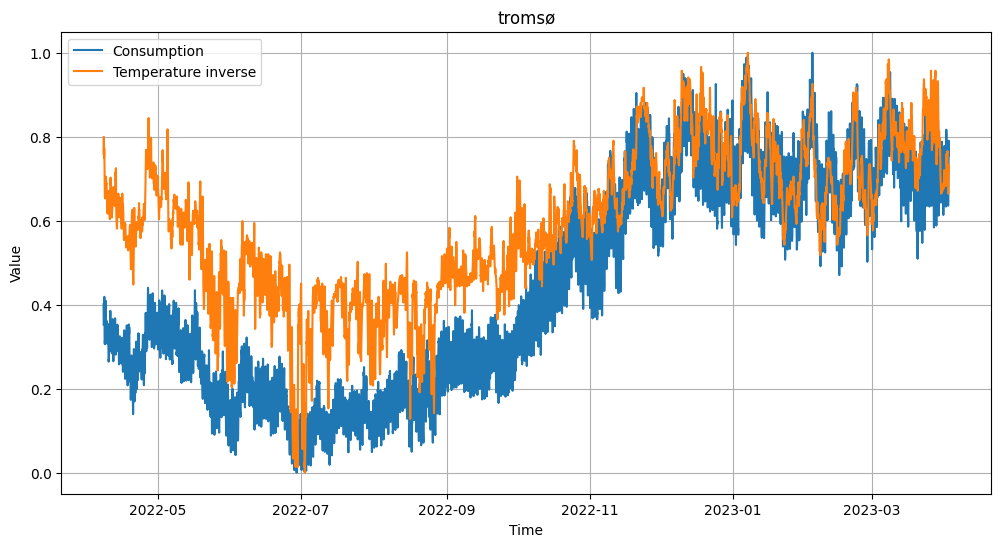

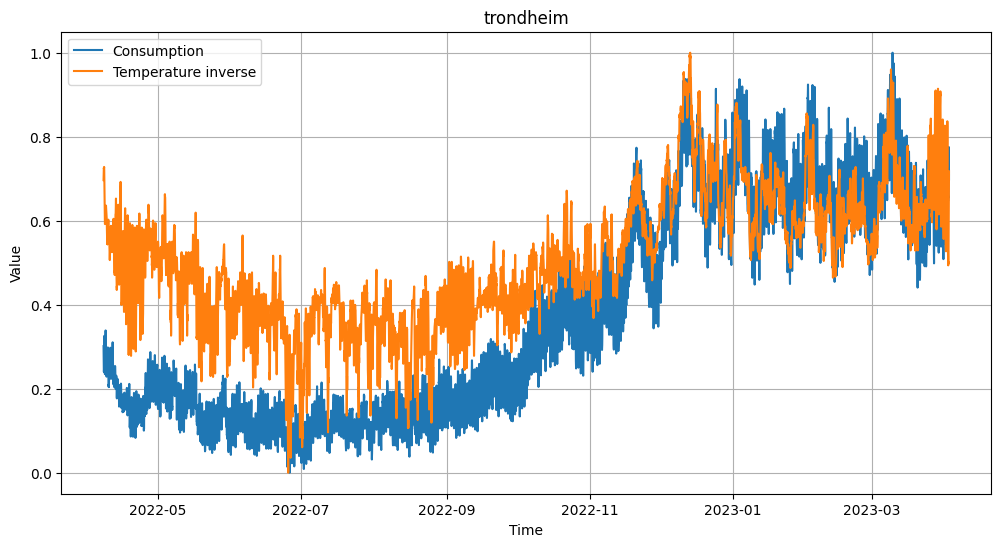

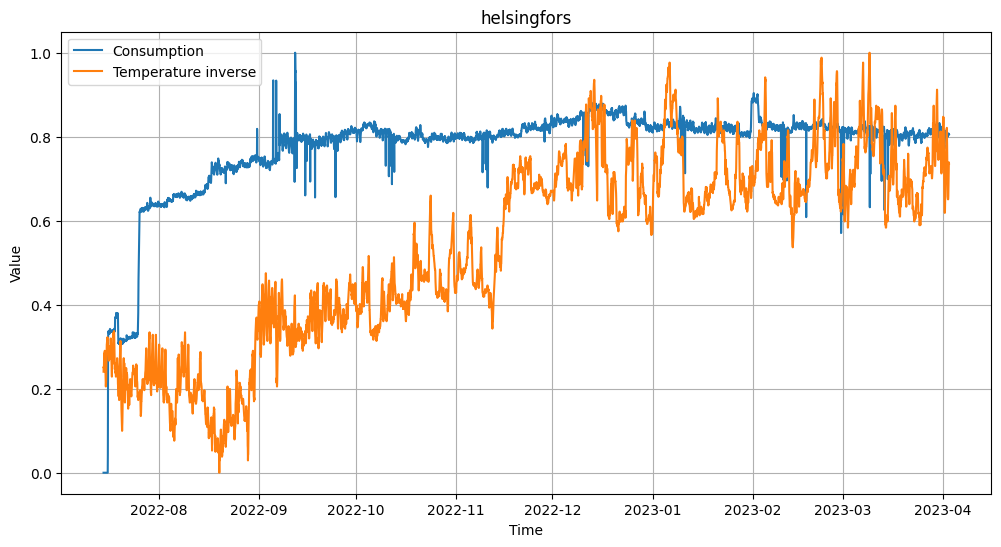

In [7]:
normalize_features = True

# Plot
for city, city_data in data_cities.items():

    # Normalize the "consumption" and "temperature" columns using Min-Max scaling
    min_consumption = city_data['consumption'].min()
    max_consumption = city_data['consumption'].max()
    min_temperature = city_data['temperature'].min()
    max_temperature = city_data['temperature'].max()

    normalized_city_data = city_data.copy()
    if normalize_features:
        normalized_city_data['consumption'] = (city_data['consumption'] - min_consumption) / (max_consumption - min_consumption)
        normalized_city_data['temperature'] = 1 - ((city_data['temperature'] - min_temperature) / (max_temperature - min_temperature))


    # Plot
    plt.figure(figsize=(12, 6))  # Set the figure size (adjust as needed)

    plt.plot(normalized_city_data['time'], normalized_city_data['consumption'], label='Consumption', linestyle='-')
    plt.plot(normalized_city_data['time'], normalized_city_data['temperature'], label='Temperature inverse', linestyle='-')

    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(city)
    plt.legend()
    plt.grid(True)

    plt.show()

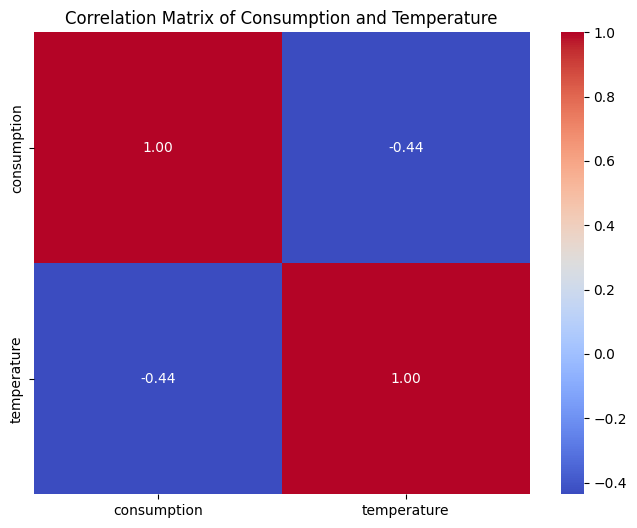

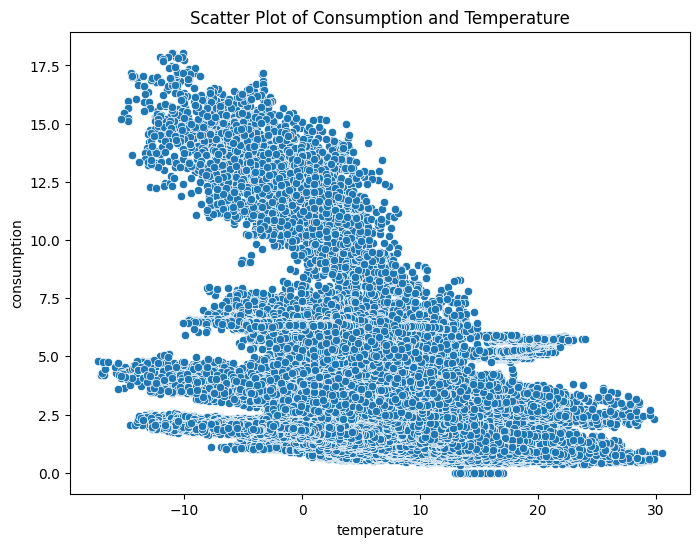

In [8]:

# Calculate the correlation matrix for numerical variables
correlation_matrix = data[['consumption', 'temperature']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Consumption and Temperature')
plt.show()

# Plot the scatter plot between consumption and temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature', y='consumption', data=data)
plt.title('Scatter Plot of Consumption and Temperature')
plt.show()




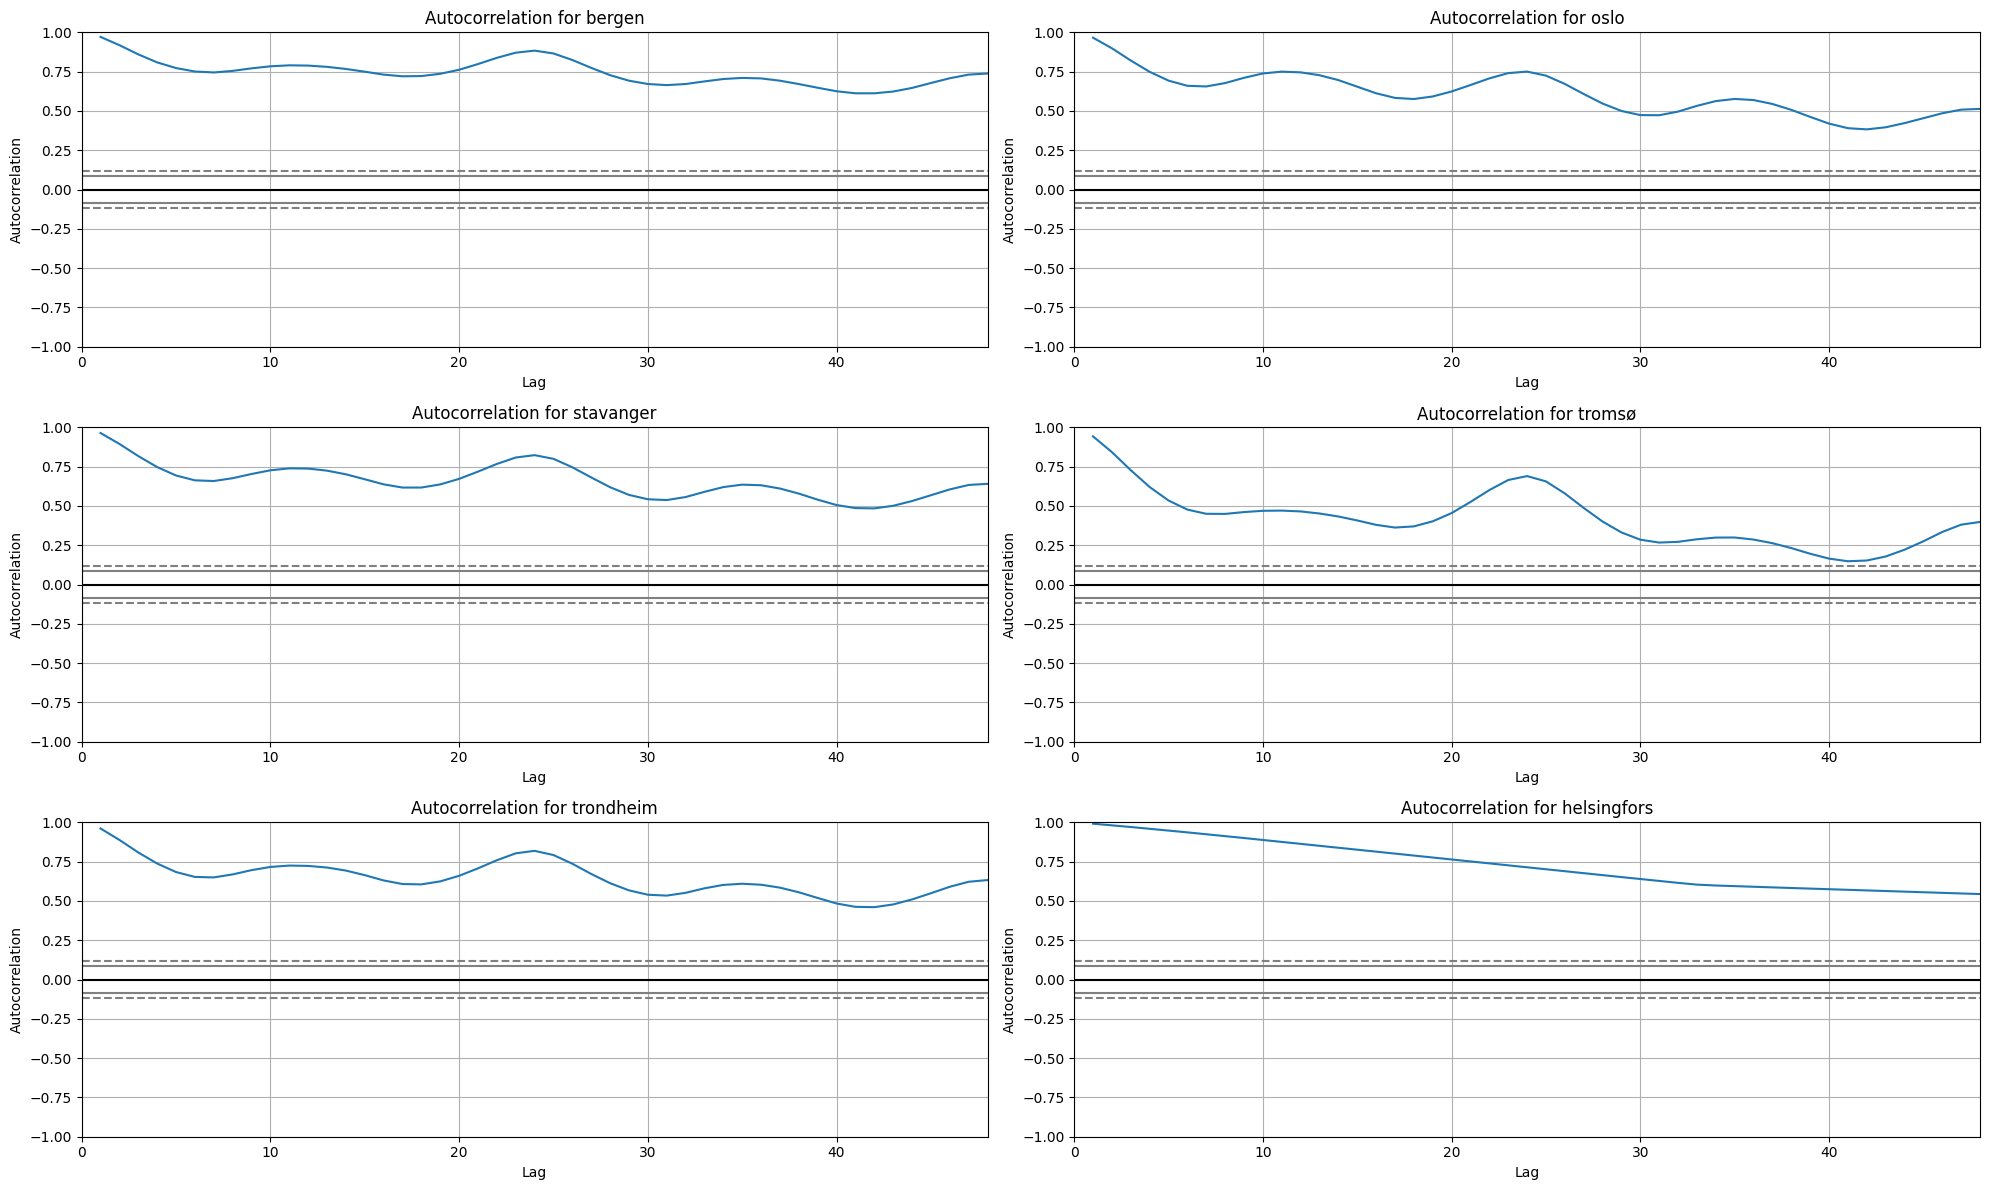

In [9]:
# Initialize a dictionary to store the autocorrelation at 24-hour lag for each location
acf_24hr = {}

# Create a new figure for ACF plots
plt.figure(figsize=(20, 12))

# Loop through each unique location and plot the autocorrelation
for i, location in enumerate(data['location'].unique()):
    plt.subplot(3, 2, i+1)
    location_data = data[data['location'] == location]['consumption'].reset_index(drop=True)
    autocorrelation_plot(location_data.iloc[:500])  # Limiting to first 500 data points for better visibility
    plt.title(f'Autocorrelation for {location}')
    plt.xlim(0, 48)  # Focus on the first 48 lags to capture daily seasonality

plt.tight_layout()
plt.show()

C:\Users\johan\AppData\Local\Temp\ipykernel_34756\2898844847.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_data['week_number'] = location_data['week_number'].astype(int)
C:\Users\johan\AppData\Local\Temp\ipykernel_34756\2898844847.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_data['consumption'] = location_data['consumption'].astype(float)
C:\Users\johan\AppData\Local\Temp\ipykernel_34756\2898844847.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

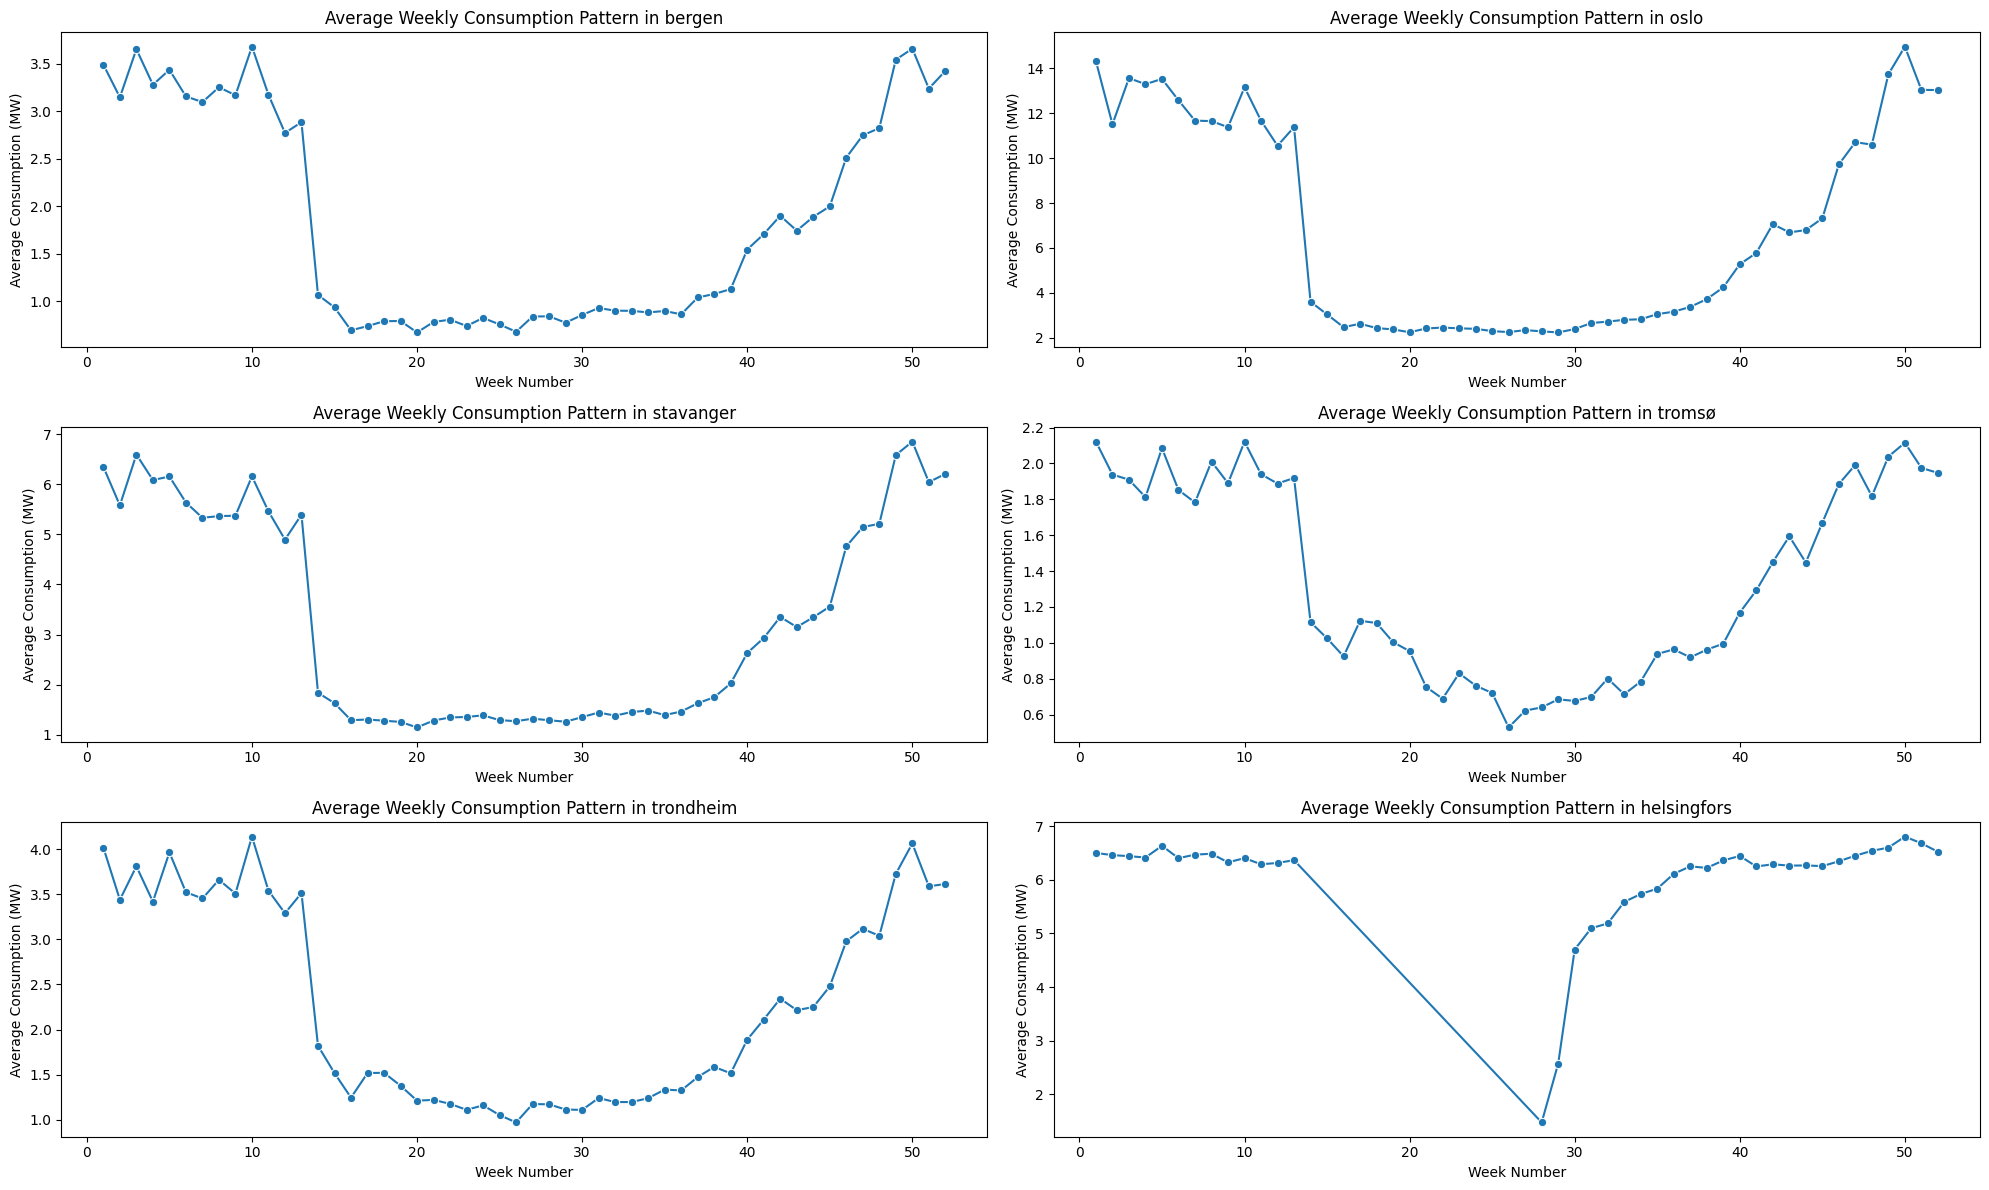

In [10]:
data['week_number'] = data['time'].dt.isocalendar().week
# Calculate the average consumption for each week number for each location
avg_week_consumption = data.groupby(['location', 'week_number'])['consumption'].mean().reset_index()


# Create a new figure for displaying the average consumption for each week number across all locations
plt.figure(figsize=(20, 12))

# Loop through each unique location and plot the average consumption for each week number
for i, location in enumerate(data['location'].unique()):
    

    plt.subplot(3, 2, i+1)
    location_data = avg_week_consumption[avg_week_consumption['location'] == location]
   
    # Convert to appropriate data types
    location_data['week_number'] = location_data['week_number'].astype(int)
    location_data['consumption'] = location_data['consumption'].astype(float)

    sns.lineplot(x='week_number', y='consumption', data=location_data, marker='o')
    plt.title(f'Average Weekly Consumption Pattern in {location}')
    plt.xlabel('Week Number')
    plt.ylabel('Average Consumption (MW)')

plt.tight_layout()
plt.show()
